In [36]:
from pandas import DataFrame,read_csv,options,set_option
import matplotlib.pyplot as plt

In [37]:
options.display.float_format = '{:,.4f}'.format
set_option('display.max_columns', None)

In [38]:
def string_to_number(text:str) -> int:
    text = text.replace(',','')
    return int(text)

In [39]:
elections_states:DataFrame = read_csv("C:/Users/michael/Documents/Election_Statistics/Simulation/States_Trump_Vs_Biden.csv",index_col=0)
elections_national:DataFrame = read_csv("C:/Users/michael/Documents/Election_Statistics/Simulation/National_Trump_Vs_Biden.csv",index_col=0)
elections_scores:DataFrame = read_csv("C:/Users/michael/Documents/Election_Statistics/Simulation/Summarized_Election_Scores.csv",index_col=0)

In [40]:
states:list = list(elections_states['State'].unique())

In [41]:
elections_national:DataFrame = elections_national.reset_index(drop=True)

In [42]:
elections_national['Trump_Polling_Error'] = elections_scores['Trump_Polling_Error']
elections_national['Biden_Polling_Error'] = elections_scores['Biden_Polling_Error']
elections_national['Polling_Error_Set'] = list(zip(elections_scores['Trump_Polling_Error'],elections_scores['Biden_Polling_Error']))
elections_national['Polling_Error_Set'] = elections_national['Polling_Error_Set'].apply(lambda x: str(x))
elections_national['Error_Set_Round_Number'] = elections_scores['Round_Number']

In [43]:
elections_national.describe()

,Trump_Electoral_Votes,Biden_Electoral_Votes,Trump_Total_Votes,Biden_Total_Votes,Trump_Vote_Percent,Biden_Vote_Percent,Trump_Polling_Error,Biden_Polling_Error,Error_Set_Round_Number
count,810.0000,810.0000,810.0000,810.0000,810.0000,810.0000,810.0000,810.0000,810.0000
mean,308.5173,229.4827,"62,521,250.2988","61,839,549.3605",48.3984,47.8707,0.0000,0.0000,5.5000
std,52.5517,52.5517,"2,614,078.5661","2,614,882.4843",2.0236,2.0242,2.5836,2.5836,2.8741
min,132.0000,144.0000,"56,799,172.0000","56,116,304.0000",43.9680,43.4440,-4.0000,-4.0000,1.0000
25%,287.0000,181.0000,"60,592,219.7500","59,943,052.5000",46.9053,46.4030,-2.0000,-2.0000,3.0000
50%,320.0000,218.0000,"62,520,787.5000","61,843,089.5000",48.3990,47.8750,0.0000,0.0000,5.5000
75%,357.0000,251.0000,"64,654,370.7500","63,971,566.2500",50.0490,49.5207,2.0000,2.0000,8.0000
max,394.0000,406.0000,"68,247,515.0000","67,579,735.0000",52.8320,52.3100,4.0000,4.0000,10.0000


In [44]:
elections_states.groupby('State').describe()['Trump_Vote_Count'].to_csv("C:/Users/michael/Documents/Election_Statistics/Simulation/Analysis/National/Trump_Vote_Count_Statistics.csv")
elections_states.groupby('State').describe()['Biden_Vote_Count'].to_csv("C:/Users/michael/Documents/Election_Statistics/Simulation/Analysis/National/Biden_Vote_Count_Statistics.csv")
elections_states.groupby('State').describe()['Trump_Vote_Percent'].to_csv("C:/Users/michael/Documents/Election_Statistics/Simulation/Analysis/National/Trump_Vote_Percent_Statistics.csv")
elections_states.groupby('State').describe()['Biden_Vote_Percent'].to_csv("C:/Users/michael/Documents/Election_Statistics/Simulation/Analysis/National/Biden_Vote_Percent_Statistics.csv")

In [45]:
for state in states:
    state_results_with_polling_error:DataFrame = elections_states[elections_states['State']==state].reset_index(drop=True)
    state_results_with_polling_error['Trump_Polling_Error'] = elections_national['Trump_Polling_Error']
    state_results_with_polling_error['Biden_Polling_Error'] = elections_national['Biden_Polling_Error']
    state_results_with_polling_error.to_csv(f"C:/Users/michael/Documents/Election_Statistics/Simulation/Analysis/States/{state}_Results_All_Elections.csv",index=False)

In [46]:
winners = elections_states.groupby('State')['Winner'].describe()

In [47]:
winners[(winners['freq']<=(winners['count']*0.8))].to_csv("C:/Users/michael/Documents/Election_Statistics/Simulation/Analysis/National/Battleground_States.csv")

In [48]:
winners[(winners['freq']==(winners['count']))&
        (winners['top']=='Trump')].to_csv("C:/Users/michael/Documents/Election_Statistics/Simulation/Analysis/National/Safe_Red_States.csv")

In [49]:
winners[(winners['freq']==(winners['count']))&
        (winners['top']=='Biden')].to_csv("C:/Users/michael/Documents/Election_Statistics/Simulation/Analysis/National/Safe_Blue_States.csv")

In [50]:
elections_national.to_csv('Nationwide_Simulated_Election_Results.csv',index=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


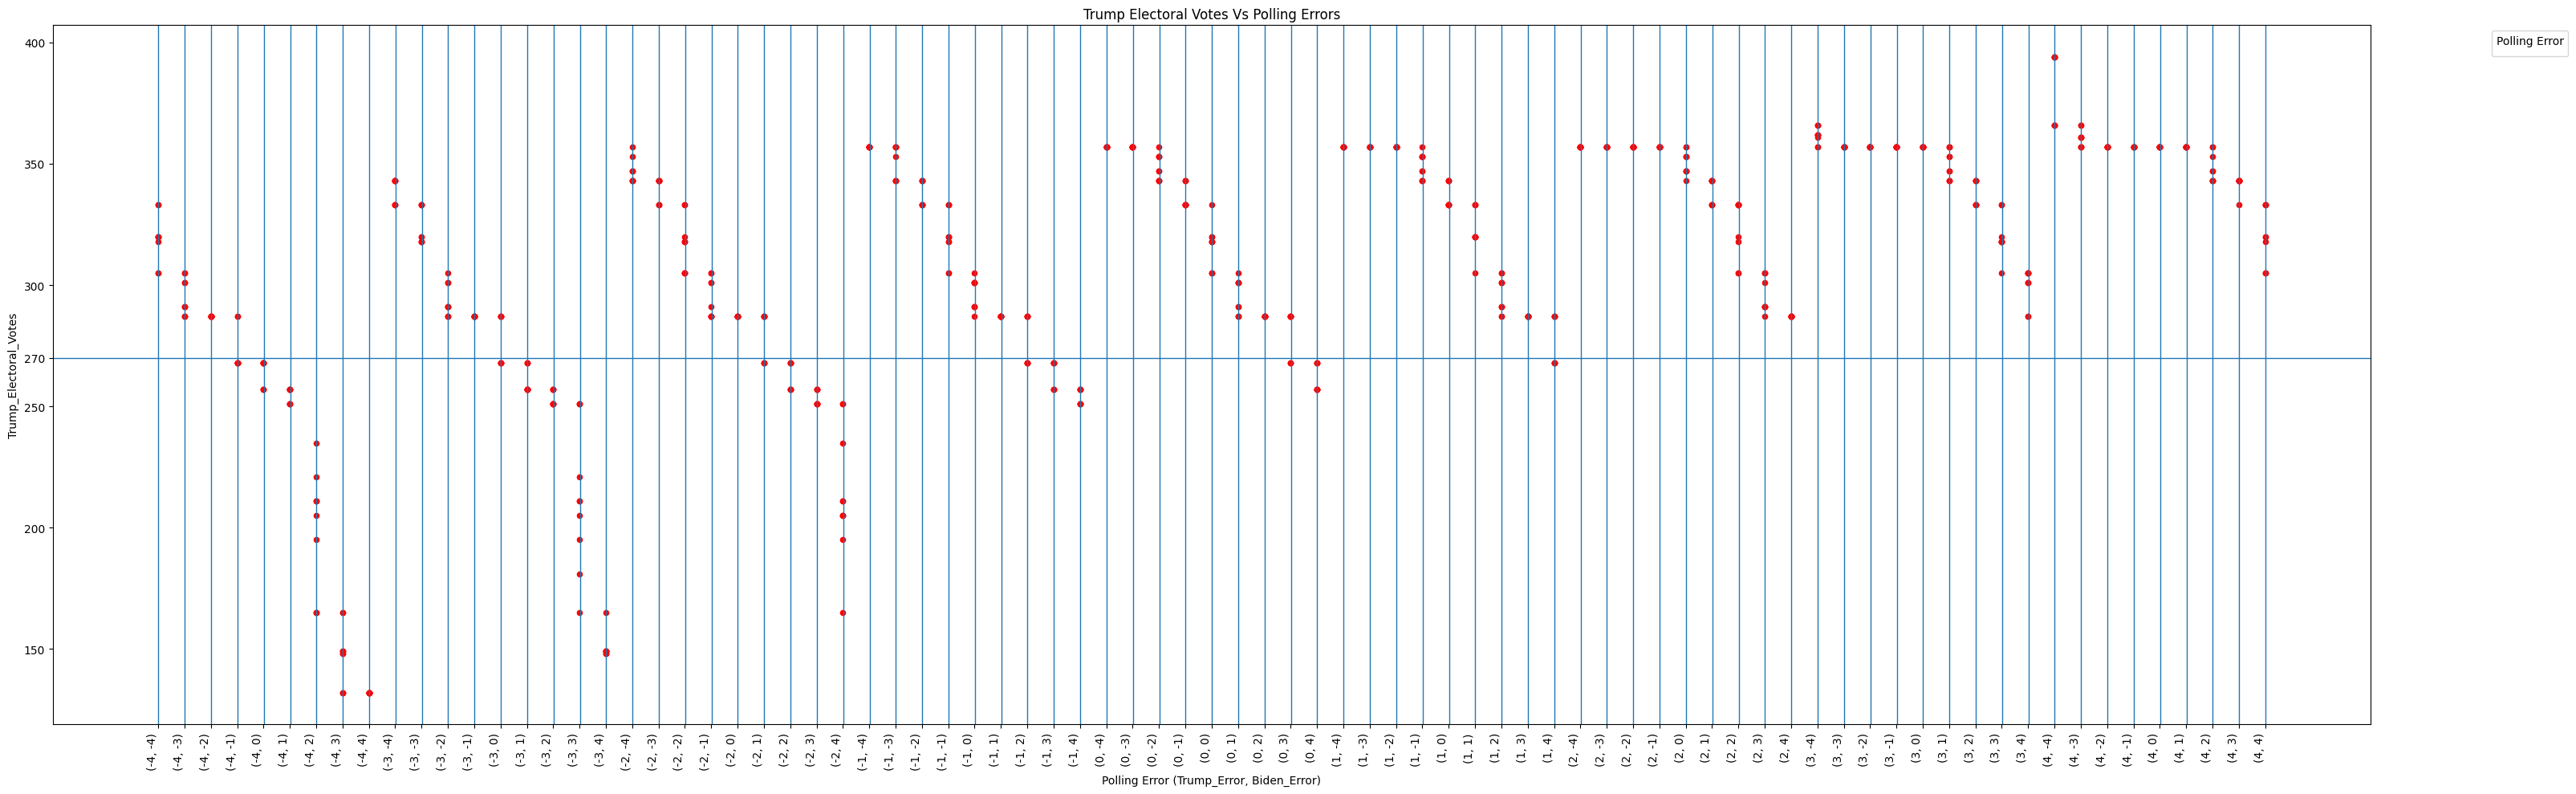

In [61]:
plt.figure(figsize=(32, 10))
plt.scatter(elections_national['Polling_Error_Set'], elections_national['Trump_Electoral_Votes'],c='red',linewidths=1,s=20)
plt.axhline(270,linewidth=1)
for x in range(81):
    plt.axvline(x+0.01,linewidth=1)
plt.xlabel('Polling Error (Trump_Error, Biden_Error)')
plt.ylabel('Trump_Electoral_Votes')
plt.title('Trump Electoral Votes Vs Polling Errors')
plt.legend(title='Polling Error', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, ha='right')
#plt.xticks()
plt.tight_layout()
plt.yticks([150,200,250,270,300,350,400])
plt.show()